In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

sns.set_theme()

In [2]:
def describe_dataframe(dataframe: pd.DataFrame, site: str, name: str):
    print(
        f"[{site}] Dataframe contains {dataframe.shape[0]} rows and {dataframe.shape[1]} columns"
    )
    dataframe.isna().mean(axis=0).sort_values().plot(
        figsize=(6, 3),
        kind="barh",
        title=f"[{site}] Missing values in {name} dataset",
        xlabel="Proportion of missing values",
    )

# Data Exploration - Beer Advocate

In [3]:
df_ba_beers = pd.read_csv("src/data/beer_advocate/beers.csv")
df_ba_breweries = pd.read_csv("src/data/beer_advocate/breweries.csv")
df_ba_users = pd.read_csv("src/data/beer_advocate/users.csv")
df_ba_ratings = pd.read_csv("src/data/beer_advocate/ratings.csv")

## Beers

[BeerAdvocate] Dataframe contains 280823 rows and 15 columns


,beer_id,brewery_id,beer_name,beer_style,ratings_count,reviews_count,ratings_average,ratings_ba_score,ratings_bros_score,beer_alcohol_by_volume,ratings_average_computed,zscore,matching_ratings_count,matching_ratings_average,beer_global_style
0,166064,39912,Nashe Moskovskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN,Pale Lager
1,166065,39912,Nashe Pivovskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN,Pale Lager
2,166066,39912,Nashe Shakhterskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN,Pale Lager
3,166067,39912,Nashe Zhigulevskoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN,Pale Lager
4,166063,39912,Zhivoe,Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN,Pale Lager


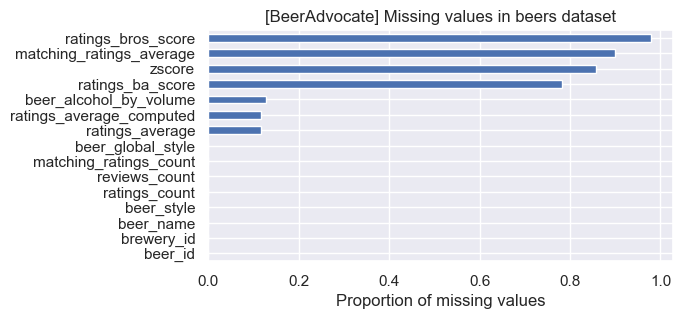

In [4]:
describe_dataframe(df_ba_beers, "BeerAdvocate", "beers")
df_ba_beers.head(5)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation, columns with NaNs are not the ones used currently in our analysis, thus it is not a problem</span>

### Breweries

[BeerAdvocate] Quartiles of the number of beers per brewery : [ 3.  8. 20.]


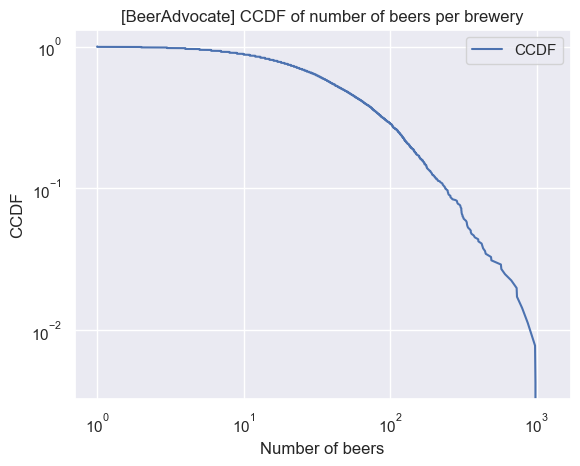

In [5]:
df_beers_by_brewery = (
    df_ba_beers.groupby("brewery_id")
    .size()
    .reset_index()
    .rename(columns={0: "count"})
    .sort_values("count", ascending=True)
)
df_beers_by_brewery["CCDF"] = (
    1 - df_beers_by_brewery["count"].cumsum(0) / df_beers_by_brewery["count"].sum()
)
df_beers_by_brewery.plot(
    x="count",
    y="CCDF",
    logx=True,
    logy=True,
    title="[BeerAdvocate] CCDF of number of beers per brewery",
    xlabel="Number of beers",
    ylabel="CCDF",
)
print(
    f"[BeerAdvocate] Quartiles of the number of beers per brewery : {df_beers_by_brewery['count'].quantile([0.25, 0.5, 0.75]).values}"
)

Graphic interpetation: 

First, this graphic represents the probability for a brewery to have more than a number of beers given in the $x$-axis.

Second, 

Plus de 10% de breweries produisent 100 bieres ou +


<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Beer Style

In [6]:
print(
    f"[BeerAdvocate] Dataset contains data about {df_ba_beers['beer_style'].nunique()} styles of beer"
)

[BeerAdvocate] Dataset contains data about 104 styles of beer


During pre-processing, we grouped several beer styles together into broader categories based on those proposed on the BeerAdvocate website, to create a taxonomy that was easier to analyze.

<Axes: title={'center': '[BeerAdvocate] Number of beers per global style'}, xlabel='Beer style', ylabel='Number of beers'>

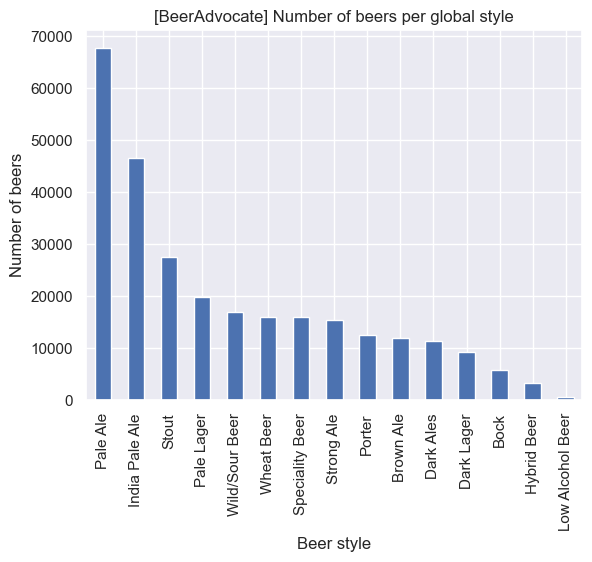

In [7]:
df_ba_beers.groupby("beer_global_style").size().sort_values(ascending=False).plot(
    kind="bar",
    title="[BeerAdvocate] Number of beers per global style",
    xlabel="Beer style",
    ylabel="Number of beers",
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Number of ratings

[BeerAdvocate] 11.69% (32841) of beers have no ratings
[BeerAdvocate] Quartiles of the number of ratings per beer : [1. 2. 8.]


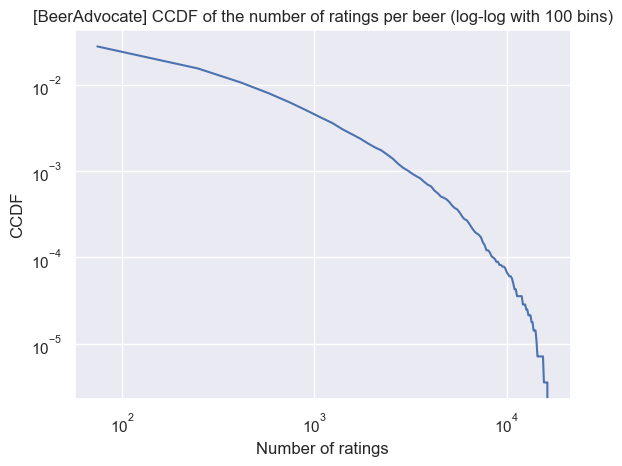

In [8]:
bin_counts = pd.cut(df_ba_beers["ratings_count"], 100).value_counts().sort_index()
ratings_per_beer_CCDF = 1 - bin_counts.cumsum(0) / bin_counts.sum()

sns.lineplot(x=[interval.mid for interval in bin_counts.index], y=ratings_per_beer_CCDF)
plt.title(
    "[BeerAdvocate] CCDF of the number of ratings per beer (log-log with 100 bins)"
)
plt.xlabel("Number of ratings")
plt.ylabel("CCDF")
plt.xscale("log")
plt.yscale("log")

print(
    f"[BeerAdvocate] {(df_ba_beers['ratings_count'] == 0).mean() * 100:.2f}% ({(df_ba_beers['ratings_count'] == 0).sum()}) of beers have no ratings"
)
print(
    f"[BeerAdvocate] Quartiles of the number of ratings per beer : {df_ba_beers['ratings_count'].quantile([0.25, 0.5, 0.75]).values}"
)

Only (a bit more than) $10\%$ of beers have at least $100$ ratings, showing that we will have to be careful making our analysis.

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Average rating

Text(0, 0.5, 'Average rating (/5)')

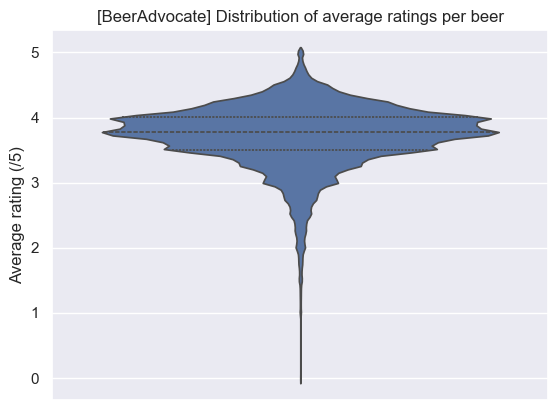

In [9]:
sns.violinplot(df_ba_beers["ratings_average"], inner="quart")
plt.title("[BeerAdvocate] Distribution of average ratings per beer")
plt.ylabel("Average rating (/5)")

Text(0.5, 0, 'Average rating (/5)')

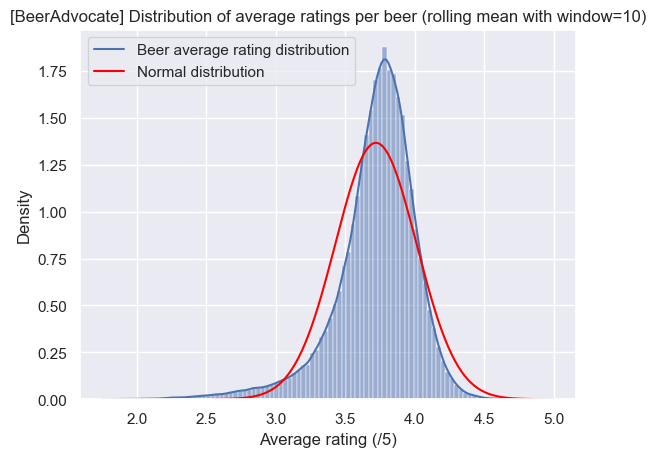

In [10]:
ratings_average_rolling = (
    df_ba_beers[df_ba_beers["ratings_average"].notna()]["ratings_average"]
    .rolling(10)
    .mean()[9:]
)
sns.histplot(ratings_average_rolling, bins=100, kde=True, stat="density")


ratings_average_mean = ratings_average_rolling.mean()
ratings_average_std = ratings_average_rolling.std()

x = np.linspace(
    ratings_average_mean - 4 * ratings_average_std,
    ratings_average_mean + 4 * ratings_average_std,
    200,
)
y = stats.norm.pdf(x, ratings_average_mean, ratings_average_std)

sns.lineplot(x=x, y=y, color="red")

plt.title(
    "[BeerAdvocate] Distribution of average ratings per beer (rolling mean with window=10)"
)
plt.legend(["Beer average rating distribution", "Normal distribution"])
plt.xlabel("Average rating (/5)")

In [11]:
ALPHA = 0.01
normality_test_results = stats.normaltest(df_ba_beers["ratings_average"].dropna())
print(f"[BeerAdvocate] {normality_test_results}")
print(
    f"[BeerAdvocate] Normality test for average ratings per beer : reject null hypothesis = {normality_test_results.pvalue < ALPHA}"
)

[BeerAdvocate] NormaltestResult(statistic=np.float64(56015.453990368434), pvalue=np.float64(0.0))
[BeerAdvocate] Normality test for average ratings per beer : reject null hypothesis = True


<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation (rolling mean because of the underlying distribution of rating with increment of 0.25) </span>

## Breweries

[BeerAdvocate] Dataframe contains 16758 rows and 6 columns
[BeerAdvocate] Dataset contains data about breweries in 195 countries


,brewery_id,brewery_name,brewery_beers_count,brewery_country,brewery_region,brewery_country_code
0,39912,Abdysh-Ata (Абдыш Ата),5,Kyrgyzstan,NaN,KGZ
1,39913,Arpa (АРПА),1,Kyrgyzstan,NaN,KGZ
2,39914,Bear Beer,4,Kyrgyzstan,NaN,KGZ
3,39915,Blonder Pub,4,Kyrgyzstan,NaN,KGZ
4,39916,Kellers Bier,2,Kyrgyzstan,NaN,KGZ


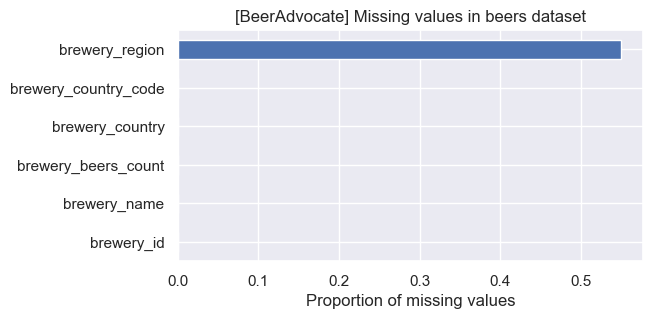

In [12]:
describe_dataframe(df_ba_breweries, "BeerAdvocate", "beers")
print(
    f'[BeerAdvocate] Dataset contains data about breweries in {df_ba_breweries["brewery_country"].nunique()} countries'
)
df_ba_breweries.head(5)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Country

[BeerAdvocate] Quartiles of the number of breweries per country : [ 1.5  4.  23. ]


<Axes: title={'center': '[BeerAdvocate] Number of breweries per country (50 largers producers)'}, xlabel='Country', ylabel='Number of breweries (log scale)'>

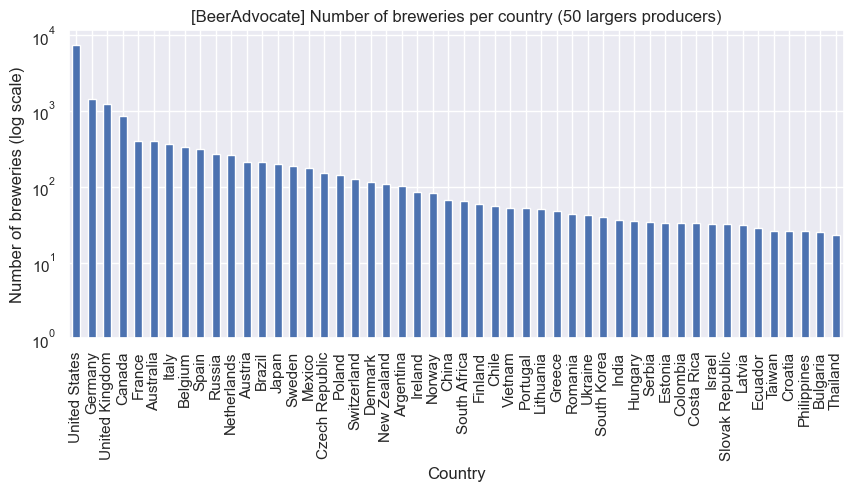

In [13]:
print(
    f'[BeerAdvocate] Quartiles of the number of breweries per country : {df_ba_breweries["brewery_country"].value_counts().quantile([0.25, 0.5, 0.75]).values}'
)

df_ba_breweries["brewery_country"].value_counts().head(50).plot(
    kind="bar",
    log=True,
    figsize=(10, 4),
    title="[BeerAdvocate] Number of breweries per country (50 largers producers)",
    xlabel="Country",
    ylabel="Number of breweries (log scale)",
)

*Observation*: 

We observe that the USA, Germany and the UK are the leader in number of breweries, the only ones with more than $1'000$ breweries. 

However this plot is not really meaningful given that Germany is sligthly above Canada in the list, but the area of Canada is larger than Germany's. 

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

## Users

[BeerAdvocate] Dataframe contains 153704 rows and 8 columns


,user_ratings_count,user_reviews_count,user_id,user_name,user_created_date,user_country,user_region,user_country_code
0,7820,465,nmann08.184925,nmann08,1.199704e+09,United States,Washington,USA
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,United States,New York,USA
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,United Kingdom,Northern Ireland,GBR
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,United Kingdom,Northern Ireland,GBR
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,United Kingdom,Northern Ireland,GBR


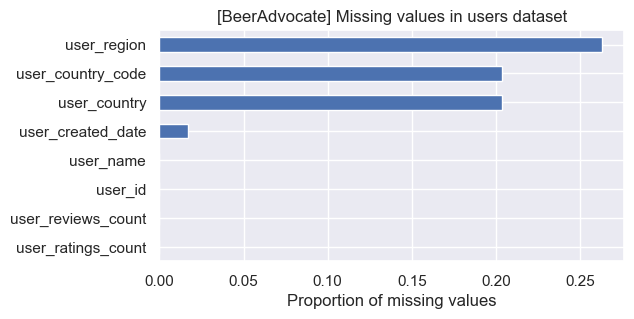

In [14]:
describe_dataframe(df_ba_users, "BeerAdvocate", "users")
df_ba_users.head(5)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Ratings

[BeerAdvocate] Quartiles of the number of ratings per user : [ 1.  3. 16.]


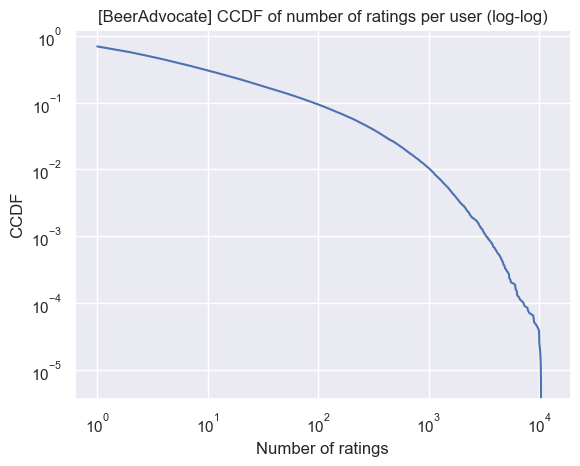

In [15]:
ratings_per_user_CCDF = (
    1
    - df_ba_users["user_ratings_count"].value_counts().sort_index().cumsum()
    / df_ba_users.shape[0]
)

ratings_per_user_CCDF.plot(
    x=df_ba_users["user_ratings_count"].value_counts().sort_index(),
    y=ratings_per_user_CCDF,
    logx=True,
    logy=True,
    title="[BeerAdvocate] CCDF of number of ratings per user (log-log)",
    xlabel="Number of ratings",
    ylabel="CCDF",
)

print(
    f"[BeerAdvocate] Quartiles of the number of ratings per user : {df_ba_users['user_ratings_count'].quantile([0.25, 0.5, 0.75]).values}"
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

*Interpretation*:
 
This graph is important to understand the rating habits of the users. Only $10\%$ of users have more than $100$ ratings. So if we want to draw conclusions we need to focus on individuals that have a large number of ratings, and thus reduce the sample that will be used for the analysis.

### Country

In [16]:
df_ba_users["user_country"].value_counts().head(10)

user_country
United States     113223
Canada              3324
United Kingdom       945
Australia            520
Germany              372
Sweden               308
Netherlands          271
Brazil               267
Belgium              227
Mexico               193
Name: count, dtype: int64

In [17]:
print(
    f'[BeerAdvocate] Users from United States represent {df_ba_users["user_country"].value_counts(normalize=True).loc['United States'] * 100:.2f}% of accounts'
)

[BeerAdvocate] Users from United States represent 92.48% of accounts


<Axes: title={'center': '[BeerAdvocate] Number of users per country'}, xlabel='Country', ylabel='Number of users (log scale)'>

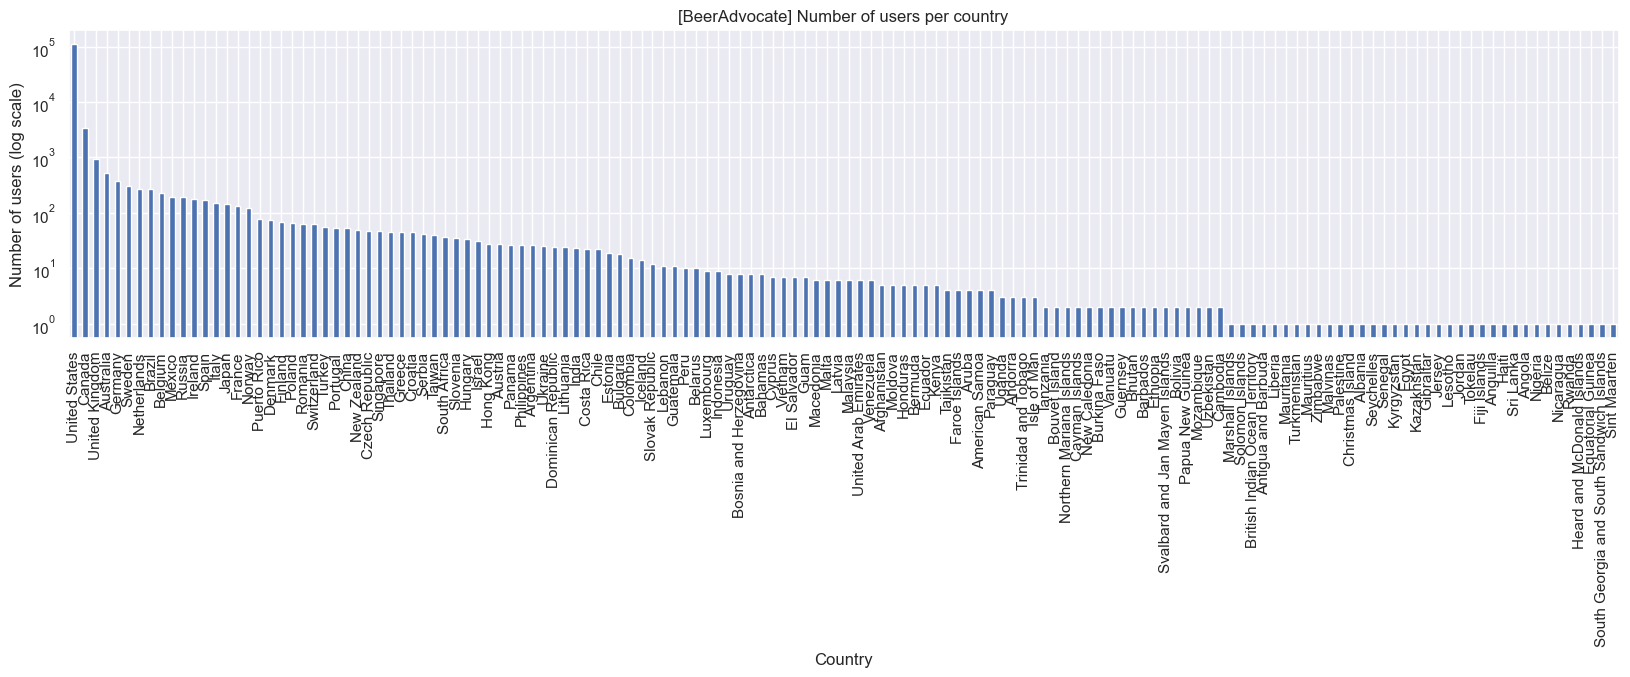

In [18]:
df_ba_users["user_country"].value_counts().plot(
    kind="bar",
    figsize=(20, 4),
    logy=True,
    title="[BeerAdvocate] Number of users per country",
    xlabel="Country",
    ylabel="Number of users (log scale)",
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Creation date

In [19]:
PRESENT_TIME = df_ba_users["user_created_date"].max()
user_years_since_creation = (
    (PRESENT_TIME - df_ba_users["user_created_date"]) / 3600 / 24 / 365.25
)

In [20]:
print(
    f"[BeerAdvocate] Mean of the number of years since user creation : {user_years_since_creation.mean():.3f}"
)
print(
    f"[BeerAdvocate] Quartiles of the number of years since user creation : {user_years_since_creation.quantile([0.25, 0.5, 0.75]).values}"
)

[BeerAdvocate] Mean of the number of years since user creation : 4.571
[BeerAdvocate] Quartiles of the number of years since user creation : [2.65560119 3.47148072 6.28610541]


<Axes: title={'center': '[BeerAdvocate] Distribution of time elapsed since user account creation (years)'}, xlabel='Years since user creation', ylabel='Number of users'>

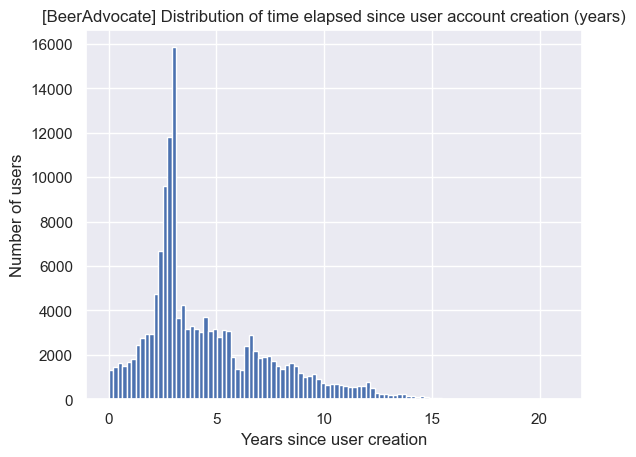

In [21]:
user_years_since_creation.plot(
    kind="hist",
    bins=100,
    title="[BeerAdvocate] Distribution of time elapsed since user account creation (years)",
    xlabel="Years since user creation",
    ylabel="Number of users",
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation (talk about the fact that a lot of accounts could be "dead" accounts that are not active anymore)</span>

*Interpretation*:

First, there was a moderate increase in the number of accounts created between 15 and 7 years ago. Then, from 7 to 6 years ago, there was a sharp decline. Later, there was a huge trend of account creation around 3 years ago. And from 2 years ago to now there has been a decrease.

However, this graph does not tell us if there are dead accounts. 

## Ratings

[BeerAdvocate] Dataframe contains 8393032 rows and 20 columns


,user_id,beer_id,brewery_id,date,review,rating,overall,aroma,appearance,palate,taste,text,user_past_ratings_count,user_past_ratings_average,beer_past_ratings_count,beer_past_ratings_average,beer_global_style,user_beer_style_past_ratings_count,user_beer_style_past_ratings_average,gini_impurity
0,nmann08.184925,142544,37262,1440064800,True,2.88,3.0,2.75,3.25,3.25,2.75,"From a bottle, pours a piss yellow color with ...",5915,3.742926,0,NaN,Pale Lager,324,3.183796,0.947660
1,stjamesgate.163714,19590,10093,1235127600,True,3.67,3.5,3.50,3.00,3.50,4.00,Pours pale copper with a thin head that quickl...,27,3.788148,3,3.903333,Pale Ale,4,3.765000,0.881834
2,mdagnew.19527,19590,10093,1142247600,True,3.73,3.5,3.50,4.00,3.50,4.00,"500ml Bottle bought from The Vintage, Antrim.....",133,4.017068,2,3.990000,Pale Ale,30,4.018667,0.952044
3,helloloser12345.10867,19590,10093,1101898800,True,3.98,4.5,3.50,4.00,4.00,4.00,Serving: 500ml brown bottlePour: Good head wit...,1,3.650000,1,4.000000,Pale Ale,2,3.815000,0.000000
4,cypressbob.3708,19590,10093,1093860000,True,4.00,4.0,4.00,4.00,4.00,4.00,"500ml bottlePours with a light, slightly hazy ...",168,3.229583,0,NaN,Pale Ale,44,3.501818,0.837813


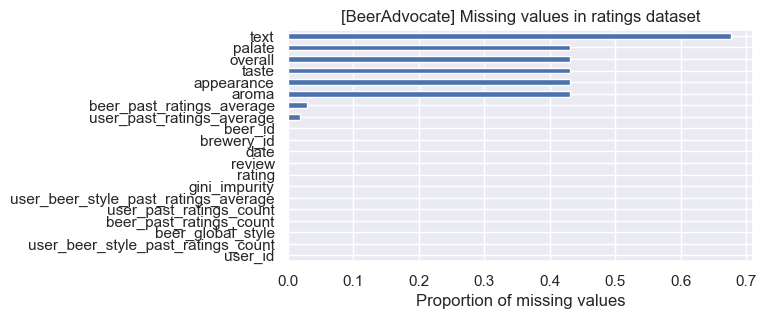

In [22]:
describe_dataframe(df_ba_ratings, "BeerAdvocate", "ratings")
df_ba_ratings.head(5)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation, for past_ratings_average it is normal because it is a shifted running average</span>

### Date

<Axes: title={'center': '[BeerAdvocate] Number of ratings per quarters'}, xlabel='Quarter', ylabel='Number of ratings'>

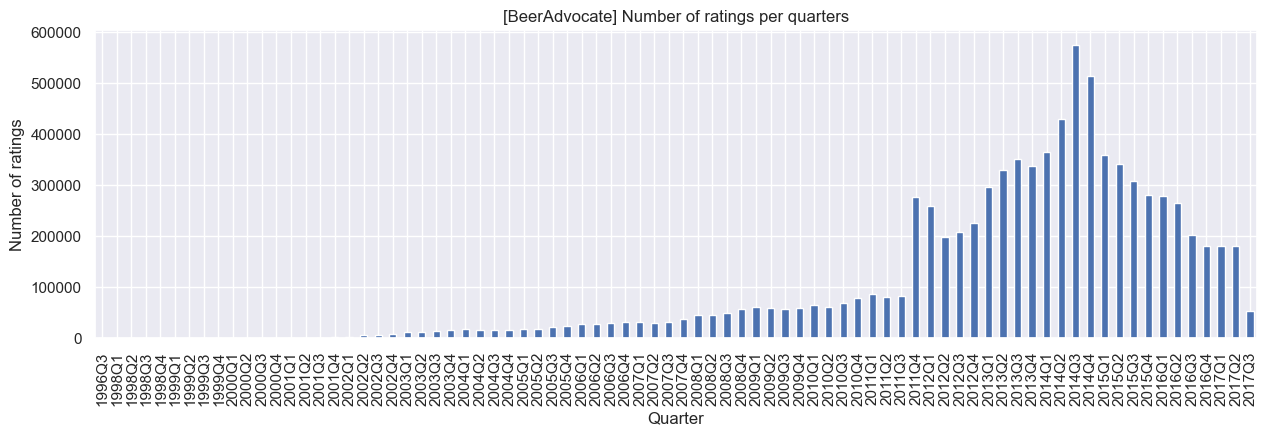

In [23]:
pd.to_datetime(df_ba_ratings["date"], unit="s").dt.to_period(
    "Q"
).value_counts().sort_index().plot(
    kind="bar",
    figsize=(15, 4),
    title="[BeerAdvocate] Number of ratings per quarters",
    xlabel="Quarter",
    ylabel="Number of ratings",
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Text

In [24]:
print(
    f"[BeerAdvocate] {(df_ba_ratings['text'].notna()).mean() * 100:.2f}% ({(df_ba_ratings['text'].notna()).sum()}) of the reviews contain a text"
)

print(
    f'[BeerAdvocate] Average length of text in reviews : {df_ba_ratings["text"].str.len().mean():.2f} characters'
)
print(
    f'[BeerAdvocate] Quartiles of the length of text in reviews : {df_ba_ratings["text"].str.len().quantile([0.25, 0.5, 0.75]).values} characters'
)

print(
    f'[BeerAdvocate] Average length of text in reviews : {(df_ba_ratings["text"].str.count(' ') + 1).mean():.2f} words'
)
print(
    f'[BeerAdvocate] Quartiles of the length of text in reviews : {(df_ba_ratings["text"].str.count(' ') + 1).quantile([0.25, 0.5, 0.75]).values} words'
)

[BeerAdvocate] 32.36% (2715709) of the reviews contain a text
[BeerAdvocate] Average length of text in reviews : 648.43 characters
[BeerAdvocate] Quartiles of the length of text in reviews : [377. 561. 816.] characters
[BeerAdvocate] Average length of text in reviews : 113.71 words
[BeerAdvocate] Quartiles of the length of text in reviews : [ 66.  98. 143.] words


Text(0.5, 0, 'Text length')

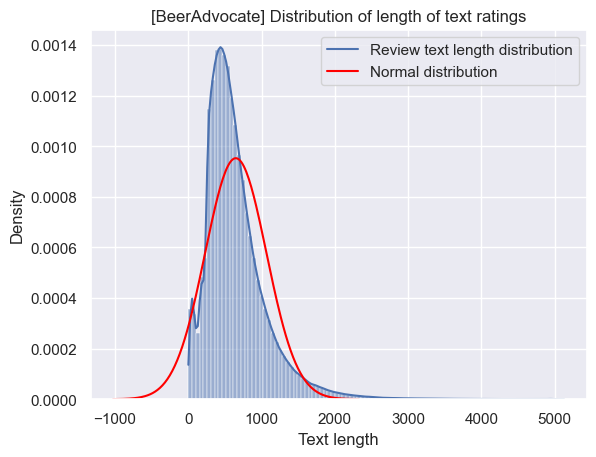

In [25]:
ratings_text_lengths = df_ba_ratings["text"].str.len()

sns.histplot(ratings_text_lengths, bins=100, kde=True, stat="density")


ratings_text_length_mean = ratings_text_lengths.mean()
ratings_text_length_std = ratings_text_lengths.std()

x = np.linspace(
    ratings_text_length_mean - 4 * ratings_text_length_std,
    ratings_text_length_mean + 4 * ratings_text_length_std,
    200,
)
y = stats.norm.pdf(x, ratings_text_length_mean, ratings_text_length_std)

sns.lineplot(x=x, y=y, color="red")

plt.title("[BeerAdvocate] Distribution of length of text ratings")
plt.legend(["Review text length distribution", "Normal distribution"])
plt.xlabel("Text length")

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Ratings (subcategories)

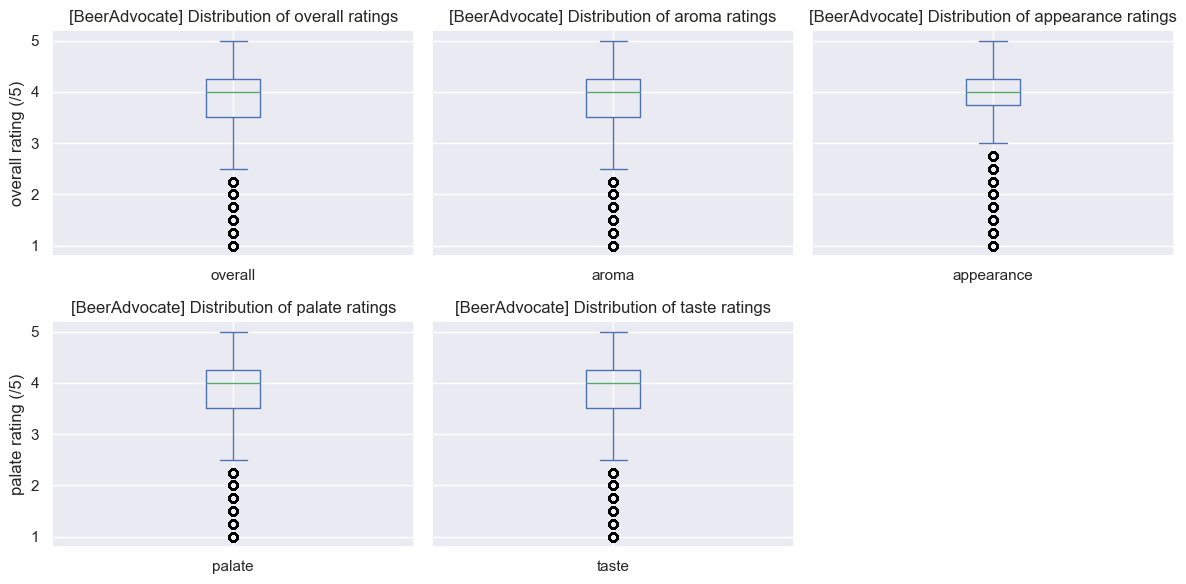

In [26]:
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(12, 6))
axs = axs.ravel()

for i, c in enumerate(["overall", "aroma", "appearance", "palate", "taste"]):
    df_ba_ratings[c].plot(
        kind="box",
        ax=axs[i],
        title=f"[BeerAdvocate] Distribution of {c} ratings",
        ylabel=f"{c} rating (/5)",
    )

fig.delaxes(axs[-1])
plt.tight_layout()

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Correlations

#### Ratings and subcategories

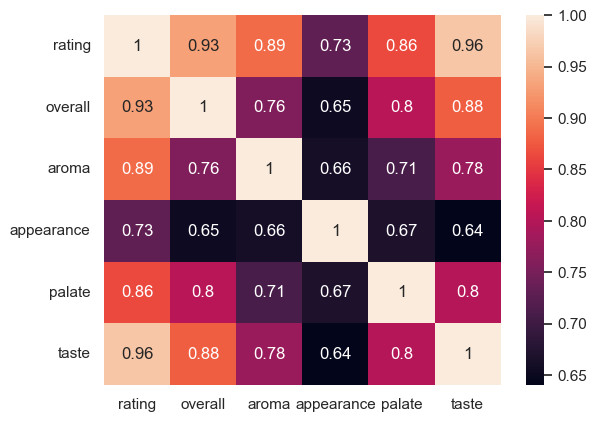

In [27]:
ratings_cross_corr_array = (
    df_ba_ratings[["rating", "overall", "aroma", "appearance", "palate", "taste"]]
    .dropna()
    .to_numpy()
)
corrcoef_ratings = np.corrcoef(ratings_cross_corr_array, rowvar=0)
sns.heatmap(
    corrcoef_ratings,
    annot=True,
    xticklabels=["rating", "overall", "aroma", "appearance", "palate", "taste"],
    yticklabels=["rating", "overall", "aroma", "appearance", "palate", "taste"],
)
plt.show()

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

In [28]:
del corrcoef_ratings

#### Ratings and past ratings

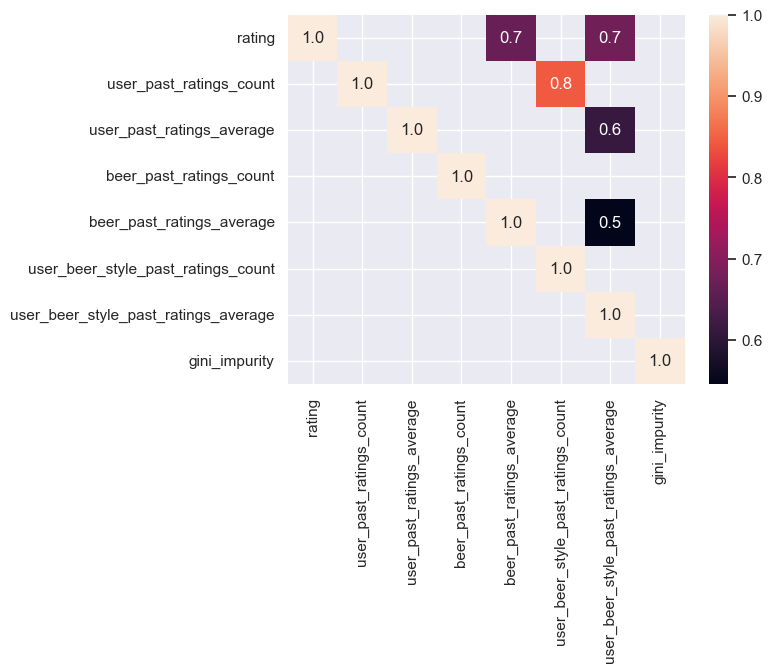

In [29]:
df_ba_ratings_full_corr_coef = df_ba_ratings.drop(
    [
        "user_id",
        "beer_id",
        "brewery_id",
        "date",
        "review",
        "text",
        "overall",
        "aroma",
        "appearance",
        "palate",
        "taste",
        "beer_global_style",
    ],
    axis=1,
)
df_ba_ratings_full_corr_coef.dropna(inplace=True)
corr_columns = df_ba_ratings_full_corr_coef.columns

corrcoef_ratings = np.corrcoef(df_ba_ratings_full_corr_coef.to_numpy(), rowvar=0)

triup_array = np.triu(corrcoef_ratings)

sns.heatmap(
    triup_array,
    annot=True,
    xticklabels=corr_columns,
    yticklabels=corr_columns,
    fmt=".1f",
    mask=np.abs(triup_array) < 0.5,
)
plt.show()

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

In [30]:
del df_ba_ratings_full_corr_coef
del corrcoef_ratings
del triup_array

# Data Exploration - Rate Beer

In [31]:
df_rb_beers = pd.read_csv("src/data/rate_beer/beers.csv")
df_rb_breweries = pd.read_csv("src/data/rate_beer/breweries.csv")
df_rb_users = pd.read_csv("src/data/rate_beer/users.csv")
df_rb_ratings = pd.read_csv("src/data/rate_beer/ratings.csv")

## Beer

[RateBeer] Dataframe contains 432818 rows and 14 columns


,beer_id,beer_name,brewery_id,beer_style,ratings_count,ratings_overall_score,style_score,ratings_average,beer_alcohol_by_volume,ratings_average_computed,zscore,matching_ratings_count,matching_ratings_average,beer_global_style
0,410549,33 Export (Gabon),3198,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN,Pale Lager
1,105273,Castel Beer (Gabon),3198,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN,Pale Lager
2,19445,Régab,3198,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN,Pale Lager
3,155699,Ards Bally Black Stout,13538,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667,Stout
4,239097,Ards Belfast 366,13538,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN,Pale Ale


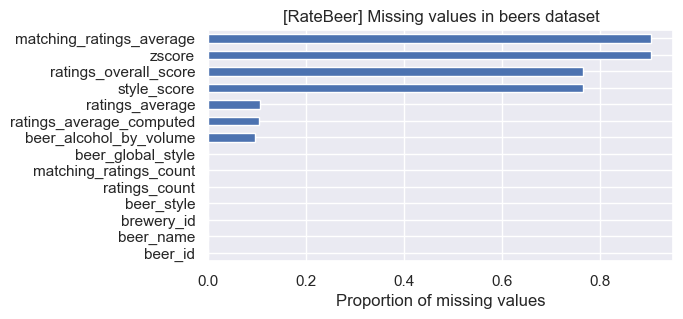

In [32]:
describe_dataframe(df_rb_beers, "RateBeer", "beers")
df_rb_beers.head(5)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Breweries

[RateBeer] Quartiles of the number of beers per brewery : [ 3.  8. 20.]


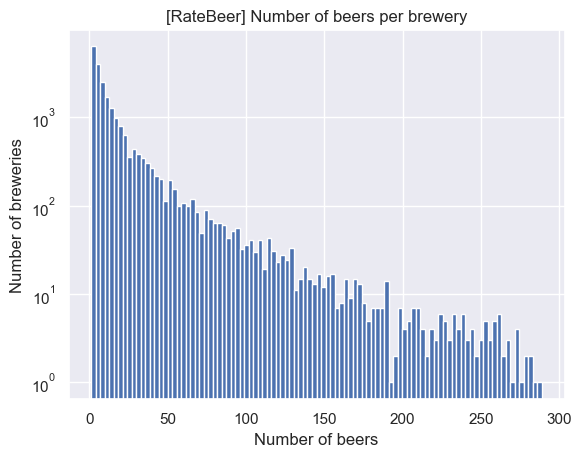

In [33]:
df_beers_by_brewery = df_rb_beers.groupby("brewery_id").size()
df_beers_by_brewery.plot(
    kind="hist",
    log=True,
    bins=100,
    title="[RateBeer] Number of beers per brewery",
    xlabel="Number of beers",
    ylabel="Number of breweries",
)
print(
    f"[RateBeer] Quartiles of the number of beers per brewery : {df_beers_by_brewery.quantile([0.25, 0.5, 0.75]).values}"
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Beer Style

In [34]:
print(
    f"[RateBeer] Dataset contains data about {df_rb_beers['beer_style'].nunique()} styles of beer"
)

[RateBeer] Dataset contains data about 72 styles of beer


<Axes: title={'center': '[RateBeer] Number of beers per global style'}, xlabel='Beer style', ylabel='Number of beers'>

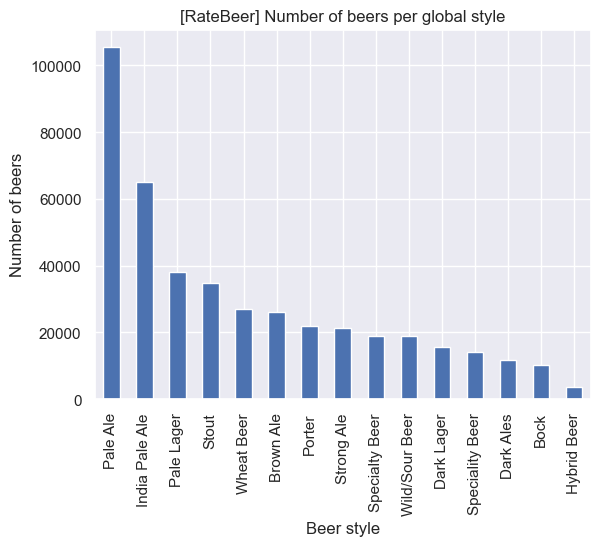

In [35]:
df_rb_beers.groupby("beer_global_style").size().sort_values(ascending=False).plot(
    kind="bar",
    title="[RateBeer] Number of beers per global style",
    xlabel="Beer style",
    ylabel="Number of beers",
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Ratings count

[RateBeer] 10.28% (44474) of beers have no ratings
[RateBeer] Quartiles of the number of ratings per beer : [1. 3. 9.]


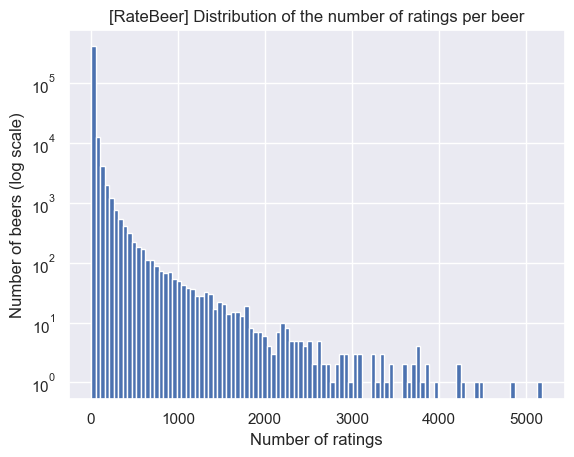

In [36]:
df_rb_beers["ratings_count"].plot(
    kind="hist",
    bins=100,
    log=True,
    title="[RateBeer] Distribution of the number of ratings per beer",
    xlabel="Number of ratings",
    ylabel="Number of beers (log scale)",
)

print(
    f"[RateBeer] {(df_rb_beers['ratings_count'] == 0).mean() * 100:.2f}% ({(df_rb_beers['ratings_count'] == 0).sum()}) of beers have no ratings"
)
print(
    f"[RateBeer] Quartiles of the number of ratings per beer : {df_rb_beers['ratings_count'].quantile([0.25, 0.5, 0.75]).values}"
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Ratings average

Text(0, 0.5, 'Average rating (/5)')

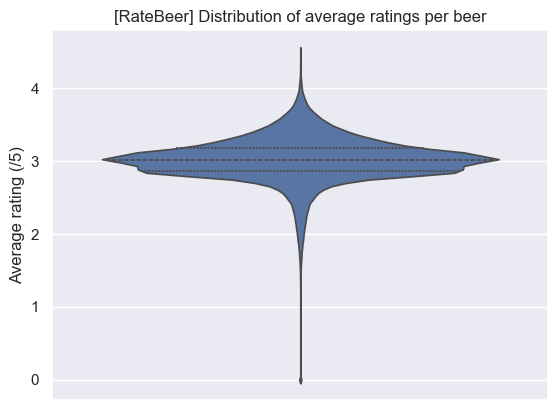

In [37]:
sns.violinplot(df_rb_beers["ratings_average"], inner="quart")
plt.title("[RateBeer] Distribution of average ratings per beer")
plt.ylabel("Average rating (/5)")

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

Text(0.5, 0, 'Average rating (/5)')

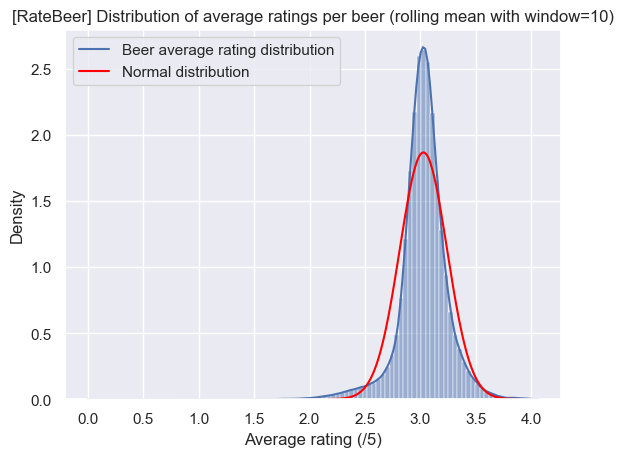

In [38]:
ratings_average_rolling = (
    df_rb_beers[df_rb_beers["ratings_average"].notna()]["ratings_average"]
    .rolling(10)
    .mean()[9:]
)
sns.histplot(ratings_average_rolling, bins=100, kde=True, stat="density")


ratings_average_mean = ratings_average_rolling.mean()
ratings_average_std = ratings_average_rolling.std()

x = np.linspace(
    ratings_average_mean - 4 * ratings_average_std,
    ratings_average_mean + 4 * ratings_average_std,
    200,
)
y = stats.norm.pdf(x, ratings_average_mean, ratings_average_std)

sns.lineplot(x=x, y=y, color="red")

plt.title(
    "[RateBeer] Distribution of average ratings per beer (rolling mean with window=10)"
)
plt.legend(["Beer average rating distribution", "Normal distribution"])
plt.xlabel("Average rating (/5)")

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

In [39]:
ALPHA = 0.01
normality_test_results = stats.normaltest(df_rb_beers["ratings_average"].dropna())
print(f"[RateBeer] {normality_test_results}")
print(
    f"[RateBeer] Normality test for average ratings per beer : reject null hypothesis = {normality_test_results.pvalue < ALPHA}"
)

[RateBeer] NormaltestResult(statistic=np.float64(101308.54918761268), pvalue=np.float64(0.0))
[RateBeer] Normality test for average ratings per beer : reject null hypothesis = True


## Breweries

[RateBeer] Dataframe contains 24189 rows and 6 columns
[RateBeer] Dataset contains data about breweries in 195 countries


,brewery_id,brewery_name,brewery_beers_count,brewery_country,brewery_region,brewery_country_code
0,3198,Sobraga,3,Gabon,NaN,GAB
1,13538,Ards Brewing Co.,13,United Kingdom,Northern Ireland,GBR
2,22304,Barrahooley Craft Brewery,4,United Kingdom,Northern Ireland,GBR
3,22818,Boundary,66,United Kingdom,Northern Ireland,GBR
4,24297,Brewbot Belfast,3,United Kingdom,Northern Ireland,GBR


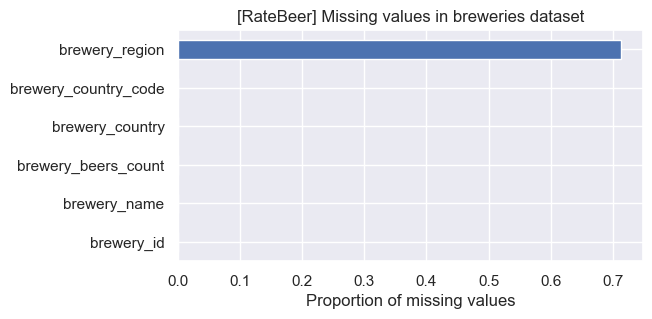

In [40]:
describe_dataframe(df_rb_breweries, "RateBeer", "breweries")
print(
    f'[RateBeer] Dataset contains data about breweries in {df_ba_breweries["brewery_country"].nunique()} countries'
)
df_rb_breweries.head(5)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Country

[RateBeer] Quartiles of the number of breweries per country : [ 2.  5. 28.]


<Axes: title={'center': '[RateBeer] Number of breweries per country (50 largers producers)'}, xlabel='Country', ylabel='Number of breweries (log scale)'>

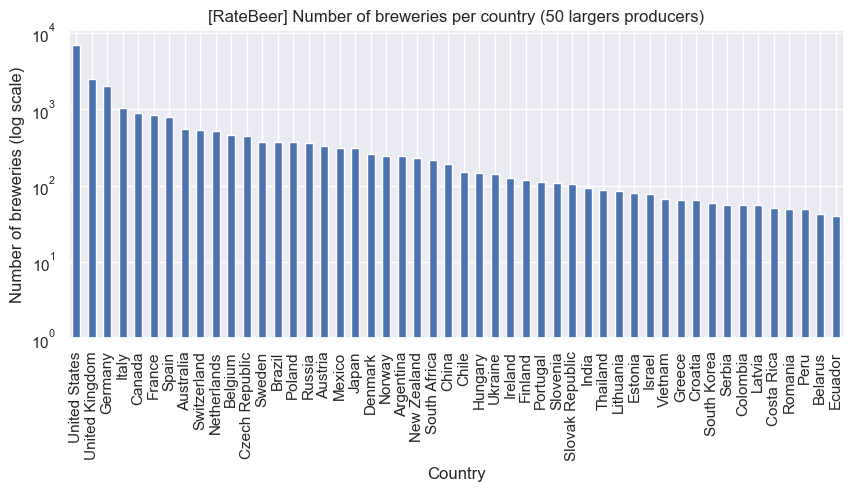

In [41]:
print(
    f'[RateBeer] Quartiles of the number of breweries per country : {df_rb_breweries["brewery_country"].value_counts().quantile([0.25, 0.5, 0.75]).values}'
)

df_rb_breweries["brewery_country"].value_counts().head(50).plot(
    kind="bar",
    log=True,
    figsize=(10, 4),
    title="[RateBeer] Number of breweries per country (50 largers producers)",
    xlabel="Country",
    ylabel="Number of breweries (log scale)",
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

## Users

[RateBeer] Dataframe contains 70120 rows and 7 columns


,user_id,user_ratings_count,user_name,user_created_date,user_country,user_region,user_country_code
0,2,52,wade,955533600.0,United States,Georgia,USA
1,3,219,billb,955533600.0,United States,Georgia,USA
2,7,42,young,955533600.0,United States,Georgia,USA
3,10,5,Mark99,955533600.0,United States,Georgia,USA
4,15,1,lazarus99,955533600.0,United States,Georgia,USA


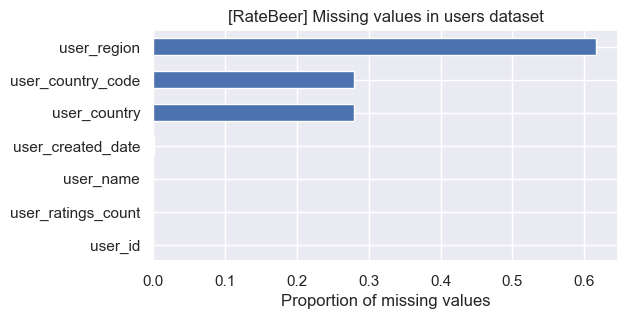

In [42]:
describe_dataframe(df_rb_users, "RateBeer", "users")
df_rb_users.head(5)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Ratings

[RateBeer] Quartiles of the number of ratings per user : [ 1.  2. 10.]


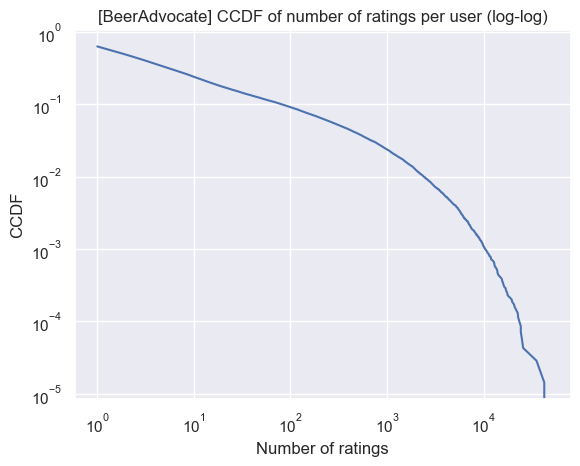

In [43]:
ratings_per_user_CCDF = (
    1
    - df_rb_users["user_ratings_count"].value_counts().sort_index().cumsum()
    / df_rb_users.shape[0]
)

ratings_per_user_CCDF.plot(
    x=df_rb_users["user_ratings_count"].value_counts().sort_index(),
    y=ratings_per_user_CCDF,
    logx=True,
    logy=True,
    title="[BeerAdvocate] CCDF of number of ratings per user (log-log)",
    xlabel="Number of ratings",
    ylabel="CCDF",
)

print(
    f"[RateBeer] Quartiles of the number of ratings per user : {df_rb_users['user_ratings_count'].quantile([0.25, 0.5, 0.75]).values}"
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Country

In [44]:
df_rb_users["user_country"].value_counts().head(10)

user_country
United States     26811
United Kingdom     3302
Canada             3255
Poland             1701
Australia          1476
Netherlands        1095
Denmark            1031
Belgium            1027
Sweden             1004
Italy               924
Name: count, dtype: int64

In [45]:
print(
    f'[RateBeer] Users from United States represent {df_rb_users["user_country"].value_counts(normalize=True).loc['United States'] * 100:.2f}% of accounts'
)

[RateBeer] Users from United States represent 53.05% of accounts


<Axes: title={'center': '[RateBeer] Number of users per country'}, xlabel='Country', ylabel='Number of users (log scale)'>

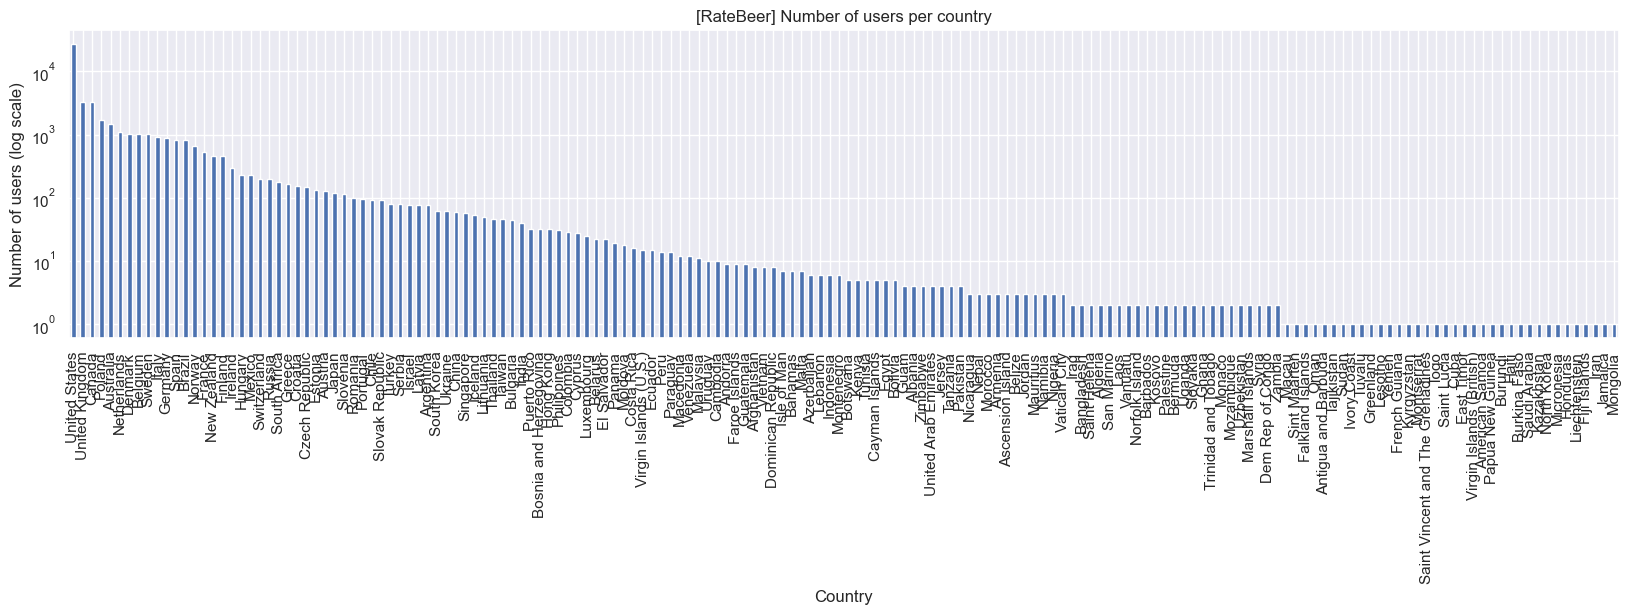

In [46]:
df_rb_users["user_country"].value_counts().plot(
    kind="bar",
    logy=True,
    figsize=(20, 4),
    title="[RateBeer] Number of users per country",
    xlabel="Country",
    ylabel="Number of users (log scale)",
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Creation date

In [47]:
PRESENT_TIME = df_rb_users["user_created_date"].max()
user_years_since_creation = (
    (PRESENT_TIME - df_rb_users["user_created_date"]) / 3600 / 24 / 365.25
)

In [48]:
print(
    f"[RateBeer] Mean of the number of years since user creation : {user_years_since_creation.mean():.3f}"
)
print(
    f"[RateBeer] Quartiles of the number of years since user creation : {user_years_since_creation.quantile([0.25, 0.5, 0.75]).values}"
)

[RateBeer] Mean of the number of years since user creation : 6.169
[RateBeer] Quartiles of the number of years since user creation : [3.02806297 5.10061602 9.41535478]


<Axes: title={'center': '[RateBeer] Distribution of time elapsed since user account creation (years)'}, xlabel='Years since user creation', ylabel='Number of users'>

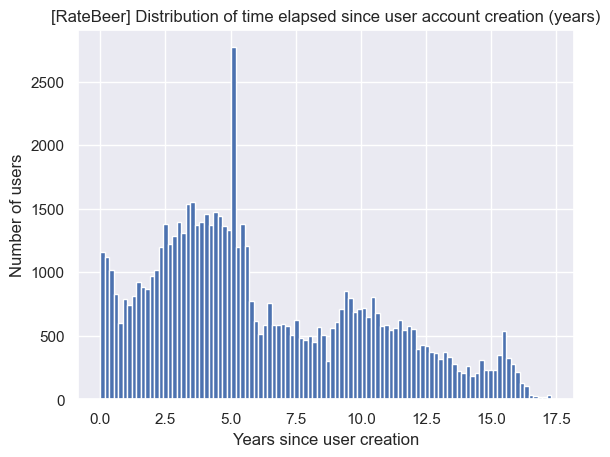

In [49]:
user_years_since_creation.plot(
    kind="hist",
    bins=100,
    title="[RateBeer] Distribution of time elapsed since user account creation (years)",
    xlabel="Years since user creation",
    ylabel="Number of users",
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

## Ratings

[RateBeer] Dataframe contains 6909161 rows and 19 columns


,user_id,beer_id,brewery_id,date,rating,overall,aroma,appearance,palate,taste,text,user_past_ratings_count,user_past_ratings_average,beer_past_ratings_count,beer_past_ratings_average,beer_global_style,user_beer_style_past_ratings_count,user_beer_style_past_ratings_average,gini_impurity
0,2,37,9,959076000,1.9,7,2,3,2,5,I hate it when I ask a waiter/waitress if they...,21,3.871429,2,2.25,Pale Lager,1,1.90,0.694849
1,2,47,11,959508000,3.9,15,7,4,4,9,"Not as impressive as Iâd hoped, but very fla...",25,3.768000,2,4.45,Pale Ale,13,3.80,0.757714
2,2,48,11,961927200,4.1,16,8,5,4,8,"Very nice porter, but so far nothing compares ...",31,3.725806,3,4.50,Porter,2,4.50,0.769288
3,2,86,17,957348000,3.5,14,7,4,3,7,"My least favorite Sammy Smith beer, but still ...",7,3.971429,0,NaN,Pale Ale,4,4.15,0.787172
4,2,89,17,957348000,4.5,18,9,5,4,9,Wow - great beer. Old Sammy comes through aga...,8,3.912500,0,NaN,Pale Ale,5,4.22,0.736607


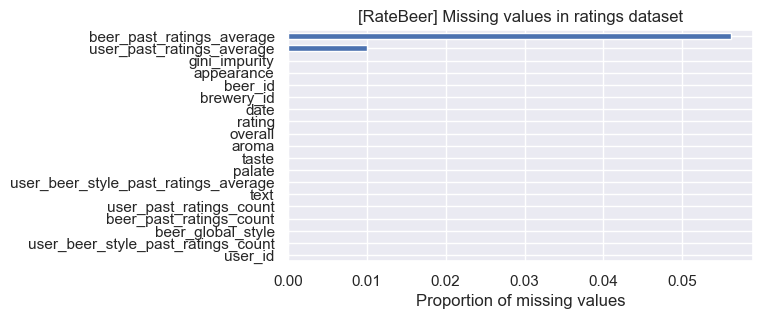

In [50]:
describe_dataframe(df_rb_ratings, "RateBeer", "ratings")
df_rb_ratings.head(5)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Date

<Axes: title={'center': '[RateBeer] Number of ratings per quarters'}, xlabel='Quarter', ylabel='Number of ratings'>

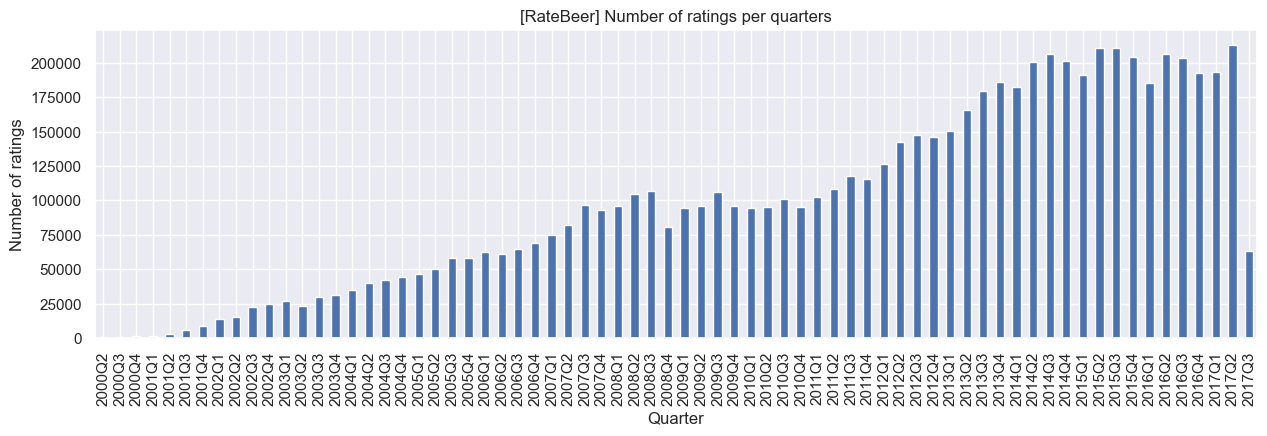

In [51]:
pd.to_datetime(df_rb_ratings["date"], unit="s").dt.to_period(
    "Q"
).value_counts().sort_index().plot(
    kind="bar",
    figsize=(15, 4),
    title="[RateBeer] Number of ratings per quarters",
    xlabel="Quarter",
    ylabel="Number of ratings",
)

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Text

In [52]:
print(
    f"[RateBeer] {(df_ba_ratings['text'].notna()).mean() * 100:.2f}% ({(df_ba_ratings['text'].notna()).sum()}) of the reviews contain a text"
)

print(
    f'[RateBeer] Average length of text in reviews : {df_ba_ratings["text"].str.len().mean():.2f} characters'
)
print(
    f'[RateBeer] Quartiles of the length of text in reviews : {df_ba_ratings["text"].str.len().quantile([0.25, 0.5, 0.75]).values} characters'
)

print(
    f'[RateBeer] Average length of text in reviews : {(df_ba_ratings["text"].str.count(' ') + 1).mean():.2f} words'
)
print(
    f'[RateBeer] Quartiles of the length of text in reviews : {(df_ba_ratings["text"].str.count(' ') + 1).quantile([0.25, 0.5, 0.75]).values} words'
)

[RateBeer] 32.36% (2715709) of the reviews contain a text
[RateBeer] Average length of text in reviews : 648.43 characters
[RateBeer] Quartiles of the length of text in reviews : [377. 561. 816.] characters
[RateBeer] Average length of text in reviews : 113.71 words
[RateBeer] Quartiles of the length of text in reviews : [ 66.  98. 143.] words


Text(0.5, 0, 'Text length')

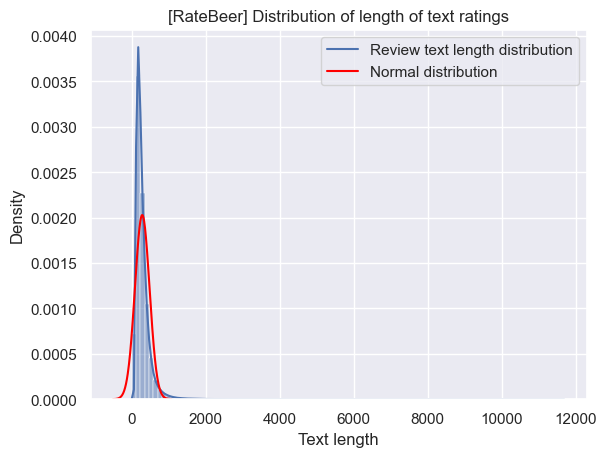

In [53]:
ratings_text_lengths = df_rb_ratings["text"].str.len()

sns.histplot(ratings_text_lengths, bins=100, kde=True, stat="density")


ratings_text_length_mean = ratings_text_lengths.mean()
ratings_text_length_std = ratings_text_lengths.std()

x = np.linspace(
    ratings_text_length_mean - 4 * ratings_text_length_std,
    ratings_text_length_mean + 4 * ratings_text_length_std,
    200,
)
y = stats.norm.pdf(x, ratings_text_length_mean, ratings_text_length_std)

sns.lineplot(x=x, y=y, color="red")

plt.title("[RateBeer] Distribution of length of text ratings")
plt.legend(["Review text length distribution", "Normal distribution"])
plt.xlabel("Text length")

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Ratings (subcategories)

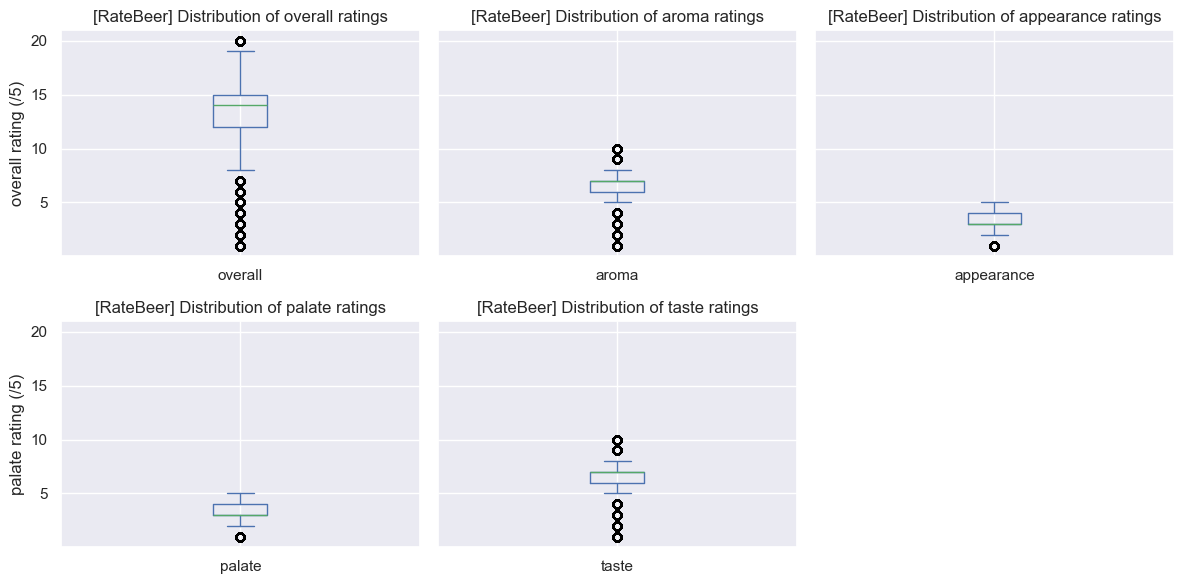

In [54]:
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(12, 6))
axs = axs.ravel()

for i, c in enumerate(["overall", "aroma", "appearance", "palate", "taste"]):
    df_rb_ratings[c].plot(
        kind="box",
        ax=axs[i],
        title=f"[RateBeer] Distribution of {c} ratings",
        ylabel=f"{c} rating (/5)",
    )

fig.delaxes(axs[-1])
plt.tight_layout()

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

### Correlations

#### Ratings and subcategories

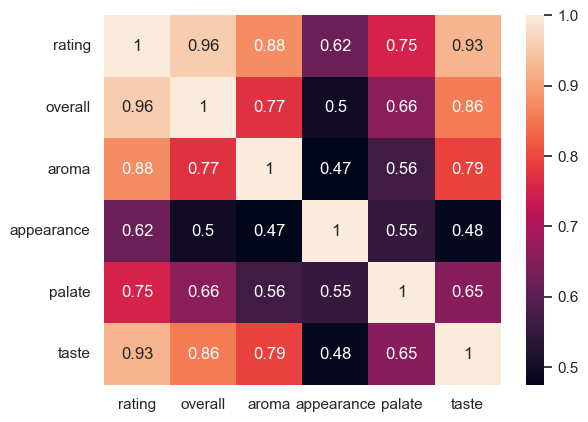

In [55]:
ratings_cross_corr_array = (
    df_rb_ratings[["rating", "overall", "aroma", "appearance", "palate", "taste"]]
    .dropna()
    .to_numpy()
)
corrcoef_ratings = np.corrcoef(ratings_cross_corr_array, rowvar=0)
sns.heatmap(
    corrcoef_ratings,
    annot=True,
    xticklabels=["rating", "overall", "aroma", "appearance", "palate", "taste"],
    yticklabels=["rating", "overall", "aroma", "appearance", "palate", "taste"],
)
plt.show()

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

In [56]:
del corrcoef_ratings

#### Ratings and past ratings

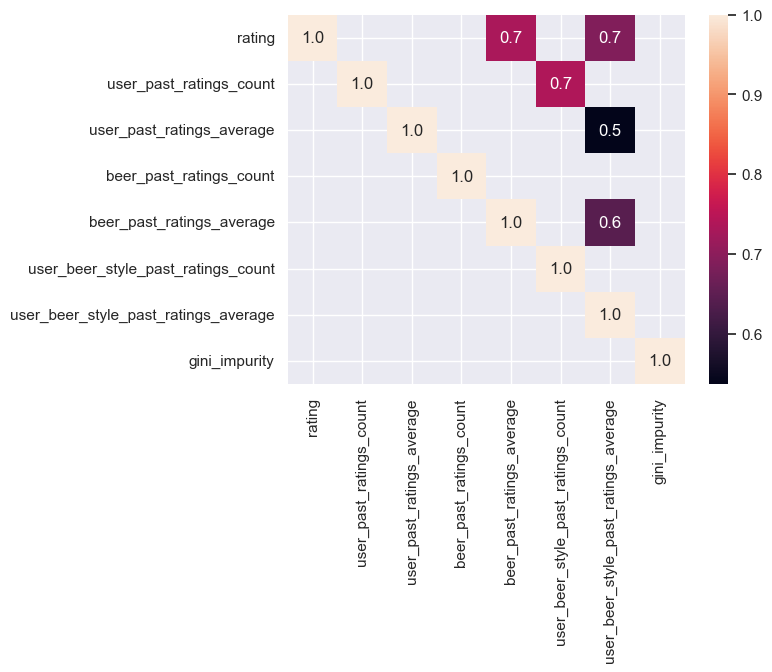

In [59]:
df_rb_ratings_full_corr_coef = df_rb_ratings.drop(
    [
        "user_id",
        "beer_id",
        "brewery_id",
        "date",
        "text",
        "overall",
        "aroma",
        "appearance",
        "palate",
        "taste",
        "beer_global_style",
    ],
    axis=1,
)
df_rb_ratings_full_corr_coef.dropna(inplace=True)
corr_columns = df_rb_ratings_full_corr_coef.columns

corrcoef_ratings = np.corrcoef(df_rb_ratings_full_corr_coef.to_numpy(), rowvar=0)

triup_array = np.triu(corrcoef_ratings)

sns.heatmap(
    triup_array,
    annot=True,
    xticklabels=corr_columns,
    yticklabels=corr_columns,
    fmt=".1f",
    mask=np.abs(triup_array) < 0.5,
)
plt.show()

<span style="background-color: red; color: white; font-weight: bold; padding: 0.75rem; display: block;">TODO : Interpretation</span>

In [60]:
del df_rb_ratings_full_corr_coef
del corrcoef_ratings
del triup_array